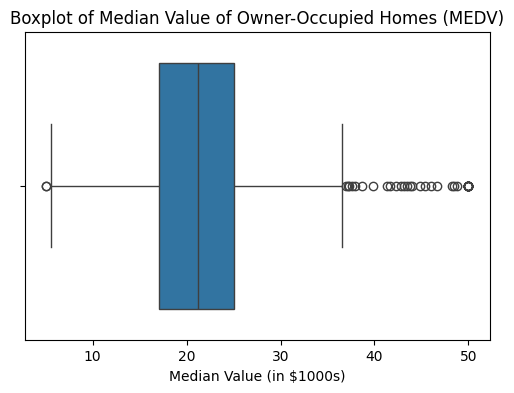

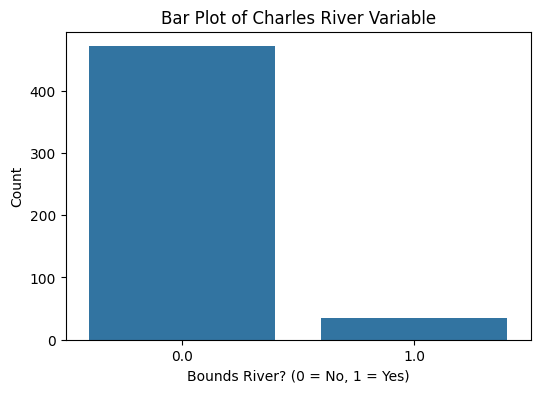

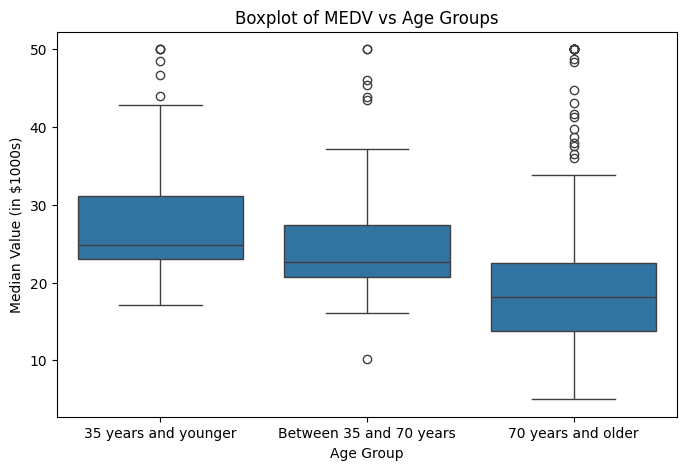

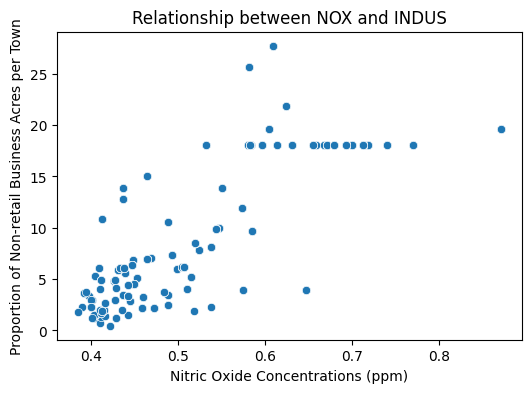

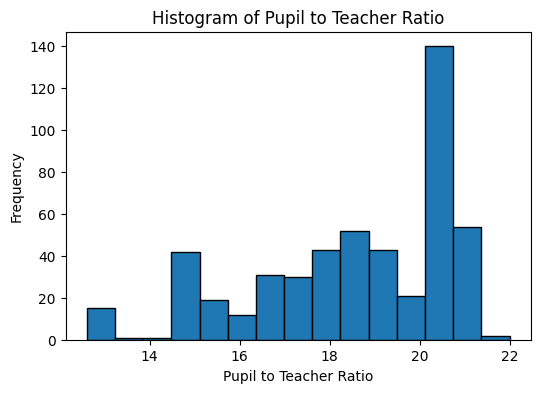

In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load local dataset
file_path = r"boston_housing.csv"  # update this path
boston_df = pd.read_csv(file_path)

# 1. Boxplot for Median value of owner-occupied homes (MEDV)
plt.figure(figsize=(6, 4))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value (in $1000s)')
plt.show()

# 2. Bar plot for the Charles river variable (CHAS)
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Bounds River? (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 3. Boxplot for MEDV vs AGE groups
# Create age group categories
age_groups = pd.cut(boston_df['AGE'],
                    bins=[0, 35, 70, 100],
                    labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(8, 5))
sns.boxplot(x=age_groups, y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

# 4. Scatter plot: NOX vs INDUS
plt.figure(figsize=(6, 4))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship between NOX and INDUS')
plt.xlabel('Nitric Oxide Concentrations (ppm)')
plt.ylabel('Proportion of Non-retail Business Acres per Town')
plt.show()

# 5. Histogram for pupil to teacher ratio (PTRATIO)
plt.figure(figsize=(6, 4))
plt.hist(boston_df['PTRATIO'], bins=15, edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [6]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load dataset
file_path = r"boston_housing.csv"  # Update path
boston_df = pd.read_csv(file_path)

alpha = 0.05

# 1. T-test for independent samples: CHAS vs MEDV
print("1️⃣ T-Test: MEDV vs Charles River (CHAS)")

# Hypotheses:
# H0: No difference in median value (MEDV) between CHAS=0 and CHAS=1
# H1: There is a difference in median value (MEDV) between CHAS=0 and CHAS=1

chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_val = stats.ttest_ind(chas0, chas1, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
if p_val < alpha:
    print("Conclusion: Reject H0 — Significant difference in MEDV between houses bounded by the Charles River and those that are not.")
else:
    print("Conclusion: Fail to reject H0 — No significant difference found.")

# 2. ANOVA: MEDV vs AGE groups
print("\n2️⃣ ANOVA: MEDV vs AGE Groups")

# Create age groups
boston_df['AgeGroup'] = pd.cut(boston_df['AGE'],
                               bins=[0, 35, 70, 100],
                               labels=['≤35', '35–70', '>70'])

# Hypotheses:
# H0: No difference in MEDV between age groups
# H1: At least one group has a different MEDV

group1 = boston_df[boston_df['AgeGroup'] == '≤35']['MEDV']
group2 = boston_df[boston_df['AgeGroup'] == '35–70']['MEDV']
group3 = boston_df[boston_df['AgeGroup'] == '>70']['MEDV']

f_stat, p_val = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")
if p_val < alpha:
    print("Conclusion: Reject H0 — Significant difference in MEDV between age groups.")
else:
    print("Conclusion: Fail to reject H0 — No significant difference found.")

# 3. Pearson correlation: NOX vs INDUS
print("\n3️⃣ Pearson Correlation: NOX vs INDUS")

# Hypotheses:
# H0: No correlation between NOX and INDUS
# H1: There is a correlation between NOX and INDUS

corr_coeff, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation coefficient: {corr_coeff:.4f}, p-value: {p_val:.4f}")
if p_val < alpha:
    print("Conclusion: Reject H0 — Significant correlation between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject H0 — No significant correlation found.")

# 4. Regression: MEDV vs DIS
print("\n4️⃣ Regression: Impact of Distance to Employment Centres on MEDV")

# Hypotheses:
# H0: Slope (β1) = 0 — No relationship between DIS and MEDV
# H1: Slope (β1) ≠ 0 — There is a relationship

model = smf.ols("MEDV ~ DIS", data=boston_df).fit()
print(model.summary())

if model.pvalues['DIS'] < alpha:
    print("Conclusion: Reject H0 — Distance to employment centres significantly impacts MEDV.")
else:
    print("Conclusion: Fail to reject H0 — No significant impact found.")


1️⃣ T-Test: MEDV vs Charles River (CHAS)
T-statistic: -3.1133, p-value: 0.0036
Conclusion: Reject H0 — Significant difference in MEDV between houses bounded by the Charles River and those that are not.

2️⃣ ANOVA: MEDV vs AGE Groups
F-statistic: 36.4076, p-value: 0.0000
Conclusion: Reject H0 — Significant difference in MEDV between age groups.

3️⃣ Pearson Correlation: NOX vs INDUS
Correlation coefficient: 0.7637, p-value: 0.0000
Conclusion: Reject H0 — Significant correlation between NOX and INDUS.

4️⃣ Regression: Impact of Distance to Employment Centres on MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        12:01